**1-4 Open AI 사용**   

   temperature : 0 ~ 2   
   max_tokens : 128k(gpt 4 기준)   
   model_name : gpt-3.5-turbo , gpt-4-turbo , gpt-4o   


In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [11]:
from langchain_openai import ChatOpenAI

# 객체 생성
yongss_llm = ChatOpenAI(
    temperature=0.1,  
    max_tokens=450,
    model_name="gpt-4o", 
)

# 질의내용
question = "인생에서 가장 중요한 것은 무엇일까요?"

# 질의
#print(f"[답변]: {yongss_llm.invoke(question)}")

yongss_llm.invoke(question)

AIMessage(content='인생에서 가장 중요한 것은 사람마다 다를 수 있습니다. 어떤 사람에게는 가족과의 시간이 가장 중요할 수 있고, 다른 사람에게는 자신의 꿈을 이루는 것이 가장 중요할 수 있습니다. 또 다른 사람에게는 건강이나 행복이 가장 중요한 가치일 수 있습니다. 중요한 것은 자신에게 진정으로 의미 있는 것이 무엇인지 고민하고, 그것을 추구하며 살아가는 것입니다. 자신의 가치관과 목표를 명확히 하고, 그것에 맞춰 삶을 설계하는 것이 중요합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 108, 'prompt_tokens': 17, 'total_tokens': 125, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_6ec83003ad', 'finish_reason': 'stop', 'logprobs': None}, id='run-9d37271a-1093-4bf3-be05-a4c0bb453064-0', usage_metadata={'input_tokens': 17, 'output_tokens': 108, 'total_tokens': 125, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
# 질의내용
question = "돈을 효율적으로 부풀리는 방법엔 무엇이 있나요?"

# 질의
response = yongss_llm.invoke(question)

response.content

'돈을 효율적으로 불리는 방법에는 여러 가지가 있습니다. 각 방법은 개인의 재정 상황, 목표, 위험 수용 능력에 따라 다르게 적용될 수 있습니다. 다음은 일반적으로 고려할 수 있는 몇 가지 방법'

logprob - 주어진 텍스트에 대한 모델의 토큰 확률의 로그 값

logprob 값이 높을수록 모델이 해당 토큰을 더 확신하고 있다는 의미, 할루시네이션의 경우 logprob이 극단적으로 낮을 수 있음을 의미
1. logprob 임계 값을 설정하여 특정 수치 이하일 경우 재시도 하거나 다른 응답을 선택하도록 지정 가능

In [ ]:
yongss_llm_logprob = ChatOpenAI(
    temperature=0.8,  
    max_tokens=1000,  
    model_name="gpt-4o",  
).bind(logprobs=True)

question = "굿어스데이터의 귀염둥이, 민문기 사원이 좋아하는 음식을 말해줘"

# 질의
response = yongss_llm_logprob.invoke(question)

response.content

'죄송하지만, 특정 개인에 대한 구체적인 정보는 제공할 수 없습니다. 민문기 사원에 대한 정보를 알고 싶으시다면, 직접 그와 대화하거나 관련된 공식 자료를 참고하시기 바랍니다.'

In [9]:
response.response_metadata

{'token_usage': {'completion_tokens': 49,
  'prompt_tokens': 33,
  'total_tokens': 82,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_6ec83003ad',
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '죄',
    'bytes': [236, 163, 132],
    'logprob': -0.03800154849886894,
    'top_logprobs': []},
   {'token': '송',
    'bytes': [236, 134, 161],
    'logprob': -3.128163257315464e-07,
    'top_logprobs': []},
   {'token': '하지만',
    'bytes': [237, 149, 152, 236, 167, 128, 235, 167, 140],
    'logprob': -0.02985253743827343,
    'top_logprobs': []},
   {'token': ',',
    'bytes': [44],
    'logprob': -0.7475042939186096,
    'top_logprobs': []},
   {'token': ' 특정',
    'bytes': [32, 237, 138, 185, 236, 160, 149],
    'logprob': -0.3523689806461334,
  

In [ ]:
answer = yongss_llm.stream("부자가 되기 위해 가져야할 좋은 습관 5가지를 설맹해줘")

for token in answer:
    print(token.content, end="",flush=True)



부자가 되기 위해서는 재정적인 성공을 지원하는 좋은 습관을 기르는 것이 중요합니다. 다음은 부자가 되기 위해 도움이 될 수 있는 다섯 가지 습관입니다.

1. **지속적인 학습과 자기계발**: 부자들은 끊임없이 배우고 성장합니다. 독서, 강연 참석, 온라인 강의 수강 등을 통해 금융, 투자, 경제에 대한 지식을 확장하고 최신 트렌드를 파악하는 것이 중요합니다.

2. **목표 설정과 계획 수립**: 명확한 재정 목표를 설정하고 이를 달성하기 위한 구체적인 계획을 세우는 것이 필요합니다. 단기 및 장기 목표를 모두 설정하고, 정기적으로 목표 달성 여부를 점검하며 계획을 수정해 나가는 것이 중요합니다.

3. **저축과 투자 습관**: 수입의 일정 부분을 저축하고, 이를 다양한 투자 수단에 분산 투자하는 습관을 기르는 것이 중요합니다. 복리의 효과를 극대화하기 위해 가능한 한 일찍 시작하는 것이 좋습니다.

4. **지출 관리**: 수입과 지출을 철저히 관리하여 불필요한 소비를 줄이고, 예산을 준수하는 습관을 기르는 것이 중요합니다. 소비를 줄이고 절약하는 생활 방식을 통해 더 많은 자금을 투자에 활용할 수 있습니다.

5. **네트워킹과 관계 구축**: 성공적인 사람들과의 네트워킹을 통해 새로운 기회를 발견하고, 다양한 분야의 전문가들과 관계를 구축하는 것이 중요합니다. 이러한 인맥은 사업 기회, 투자 정보, 조언 등을 제공할 수 있습니다.

이러한 습관들은 시간이 지남에 따라 재정적 성공을 이루는 데 큰 도움이 될 수 있습니다. 꾸준히 실천하고 개선해 나가는 것이 중요합니다.

In [14]:
common = yongss_llm.invoke("부자가 되기 위해 가져야할 좋은 습관 5가지를 설맹해줘")
common

AIMessage(content='부자가 되기 위해서는 재정적인 성공을 위한 좋은 습관을 기르는 것이 중요합니다. 다음은 부자가 되기 위해 도움이 될 수 있는 다섯 가지 습관입니다.\n\n1. **지출 관리 및 예산 수립**: 자신의 수입과 지출을 명확히 파악하고, 예산을 세워 지출을 관리하는 것이 중요합니다. 불필요한 지출을 줄이고, 저축과 투자를 위한 자금을 확보하는 데 도움이 됩니다.\n\n2. **지속적인 학습과 자기계발**: 금융, 투자, 경제에 대한 지식을 지속적으로 쌓는 것이 중요합니다. 책을 읽거나, 강의를 듣거나, 전문가의 조언을 구하는 등 다양한 방법으로 자기계발을 통해 더 나은 재정 결정을 내릴 수 있습니다.\n\n3. **저축과 투자 습관**: 수입의 일정 부분을 저축하고, 장기적인 관점에서 투자를 하는 습관을 기르는 것이 중요합니다. 복리의 효과를 극대화하기 위해 일찍 시작하는 것이 좋습니다.\n\n4. **목표 설정과 계획 수립**: 명확한 재정 목표를 설정하고, 이를 달성하기 위한 구체적인 계획을 세우는 것이 중요합니다. 목표를 시각화하고, 이를 달성하기 위한 단기 및 장기 계획을 수립하여 꾸준히 실천합니다.\n\n5. **네트워킹과 관계 구축**: 성공적인 사람들과의 네트워킹을 통해 새로운 기회를 얻고, 다양한 관점을 배울 수 있습니다. 긍정적이고 성공적인 사람들과의 관계를 통해 동기부여를 얻고, 자신의 목표를 달성하는 데 도움을 받을 수 있습니다.\n\n이러한 습관들은 꾸준한 실천과 인내가 필요하며, 시간이 지남에 따라 재정적인 성공을 이루는 데 큰 도움이 될 것입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 413, 'prompt_tokens': 28, 'total_tokens': 441, 'completion_tokens_details': {'accepted_prediction_tokens': 0,

***invoke vs stream***   

https://goodusdata-team-aq5nx8k0.atlassian.net/wiki/x/3gBuAw

In [ ]:
from langchain_teddynote.messages import stream_response

# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = yongss_llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")
stream_response(answer)

"""
answer = yongss_llm.stream("부자가 되기 위해 가져야할 좋은 습관 5가지를 설맹해줘")

for token in answer:
    print(token.content, end="",flush=True)"
"""

대한민국에는 아름다운 관광지가 많이 있습니다. 아래는 그 중 10곳과 해당 주소입니다.

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주 성산일출봉**
   - 주소: 제주특별자치도 서귀포시 성산읍 성산리 1

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 1091

6. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

7. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

8. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회종가길 40

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **순천만 국가정원**
    - 주소: 전라남도 순천시 국가정원1호길 47

이곳들은 각기 다른 매력을 가지고 있어 다양한 경험을 제공할 것입니다. 여행 계획에 참고하시기 바랍니다!

***멀티모달***   
이미지, 오디오, 비디오 처리 가능능


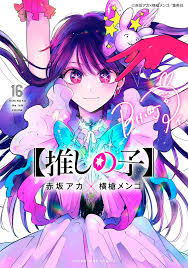

The image is a cover of a manga titled "【推しの子】" (Oshi no Ko), created by Akasaka Aka and Yokoyari Mengo. The artwork features a vibrant and colorful illustration of a character with long, flowing hair in shades of purple and blue. The character is wearing a detailed outfit with star motifs and appears to be in a dynamic pose, possibly performing or in a dramatic scene.

The background is bright and filled with light effects, enhancing the energetic and lively feel of the image. The character's eyes are large and expressive, typical of manga art styles, and the overall composition suggests themes of performance, idol culture, or entertainment.

The text includes the names of the creators and the title, which translates to "My Favorite Idol" or "Oshi no Ko," indicating a focus on the idol industry or fandom. The use of bright colors and dynamic design elements suggests a story that is both dramatic and engaging.

'\n\n# 샘플 이미지 주소(웹사이트로 부터 바로 인식)\nIMAGE_URL = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSG7zQhjK2h7qMfboJgwgr_M0uWxMX6ENBH8Q&s"\nquery = "사진 속 캐릭터에 대해 설명해줘"\n# 이미지 파일로 부터 질의\nanswer = multimodal_llm.invoke(query,IMAGE_URL)\n# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)\nanswer\n'

In [23]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)


# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSG7zQhjK2h7qMfboJgwgr_M0uWxMX6ENBH8Q&s"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)
"""

# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSG7zQhjK2h7qMfboJgwgr_M0uWxMX6ENBH8Q&s"
query = "사진 속 캐릭터에 대해 설명해줘"
# 이미지 파일로 부터 질의
answer = multimodal_llm.invoke(query,IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
answer
"""




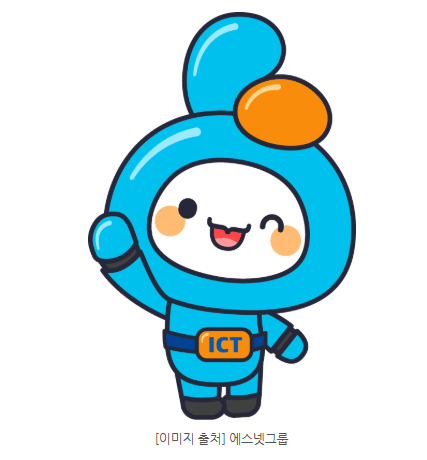

The image features a cute, cartoon-style character. Here’s a detailed description:

1. **Appearance**: 
   - The character is predominantly blue with a round head and body.
   - It has a large, friendly face with a wide smile and rosy cheeks.
   - The eyes are small and black, adding to the cheerful expression.

2. **Outfit**:
   - The character is wearing a blue suit with a belt labeled "ICT."
   - It has black gloves and boots, giving it a uniform or superhero-like appearance.

3. **Design Elements**:
   - There is an orange element on top of the head, possibly representing hair or a hat.
   - The character is waving with one hand, suggesting a welcoming or friendly gesture.

4. **Style**:
   - The overall design is simple and colorful, appealing to a younger audience or for use in branding.

5. **Text**:
   - There is Korean text below the image, indicating the source as "S-Net Group."

This character likely serves as a mascot or promotional figure, possibly related to technology or

In [25]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "C:/Users/GoodusData/Downloads/3333.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


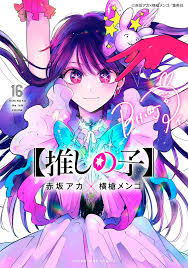

이 포스터의 캐릭터는 화려한 색상의 머리와 눈을 가지고 있으며, 아이돌 같은 의상을 입고 있습니다. 그녀는 밝고 생동감 있는 분위기를 풍기며, 무대 위에서 빛나는 존재감을 가지고 있는 것처럼 보입니다.

이 캐릭터와 어울리는 다른 애니의 캐릭터로는 "러브 라이브!" 시리즈의 캐릭터들이 있습니다. 이 시리즈의 캐릭터들도 아이돌로서 무대 위에서 빛나는 모습을 보여주며, 다양한 색상과 스타일의 의상을 입고 있습니다. 특히, "니코 야자와" 같은 캐릭터는 비슷한 아이돌 테마와 에너지를 공유합니다.

In [26]:
system_prompt = """너는 일본 애니 전문가야, 너의 역할은 주어지는 애니 포스터의 캐릭터를 분석 하는거야."""

user_prompt = """인기 애니의 포스터를 제시할게, 캐릭터를 묘사해주고, 이 캐릭터와 어울리는 다른 애니의 캐릭터를 소개해줘"""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)

# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_URL = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSG7zQhjK2h7qMfboJgwgr_M0uWxMX6ENBH8Q&s"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_URL)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)
